##  plot  STAR r4s task preformance in SLURM
from JSON
OLD
{"realSec": 16082.65, "dataSizeGb": 0.9886128455400467, "eneMean": 0.576, "numEvt": 193254, "coreR": "Neutrino.0054134.Physics.EH1-Merged.P15A-C._0236", "eneRms": 0.182, "recoSizeGb": "1.0053"}

NEW:
{"realSec": 9721.71, "startDate": "Thu Apr 13 15:05:57 PDT 2017", "cpuEfi": 0.991, "core": "st_mtd_adc_16092042_raw_5500010_fset1", "nMuDst": "68"}

In [58]:
# INput produced by : ~/star-pipeline/procQA> ./r4sTaskScan.py
jsonF='starQA1.json'
!ls -hl $jsonF

-rw-r----- 1 balewski balewski 45K Apr 17 16:16 starQA1.json


In [59]:
#module load root
#module load python/3.5-anaconda

#!./r4sTaskScan.py

In [60]:
import json
from datetime import datetime
import dateutil.parser as tmparser

print ("read from disc:",jsonF)
nr=0
numMuEvtV=[]
realHourV=[]
cpuEfiV=[]
timeV=[]
ns=0
with open(jsonF) as inpFile:
    for line in inpFile:
        #print (line)
        d=json.loads(line)
        nMu=d["nMuDst"] 
        ns=ns+1
        if nMu<0:
            continue
        nr+=1
       
        if nr<2:
            print (nr,d)
            
        cpuEfiV.append(d["cpuEfi"])
        numMuEvtV.append(nMu)
        realHourV.append(float(d['realSec'])/3600.)

        dayStr=d["startDate"]
        #print(dayStr) 
    
        date1=tmparser.parse(dayStr) 
        #print(date1)
        timeV.append(date1)
    
    
        if nr>2009999:
            break
    inpFile.close

print("ns=",ns," sizeV len=",len(cpuEfiV))
print("rec0=",cpuEfiV[0],realHourV[0],timeV[0])

read from disc: starQA1.json
1 {'cpuEfi': 0.509, 'core': 'st_mtd_adc_16103032_raw_1500007', 'nMuDst': 8, 'startDate': 'Mon Apr 17 15:45:27 PDT 2017', 'realSec': 825.15}
ns= 332  sizeV len= 232
rec0= 0.509 0.22920833333333332 2017-04-17 15:45:27-07:00


##  plot

In [61]:
%matplotlib inline
import datetime
import numpy as np
import matplotlib.pylab as plt
from matplotlib.dates import DateFormatter
# matplotlib date format object
hfmt = DateFormatter('%H:%M\n %a')


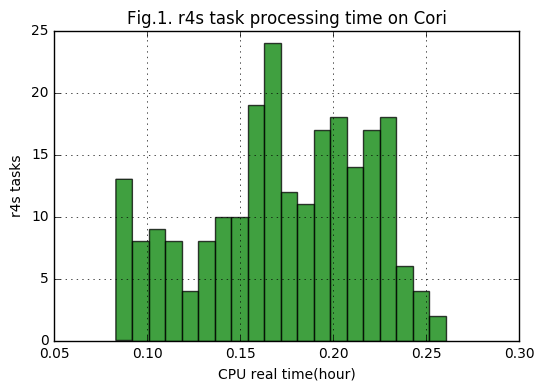

In [62]:
# the histogram  job time
n, binsA, patches = plt.hist(realHourV, 20,facecolor='green', alpha=0.75)  #, range=(1.,3.5)
plt.grid(True)
plt.xlabel('CPU real time(hour)')
plt.ylabel('r4s tasks')
plt.title('Fig.1. r4s task processing time on Cori')


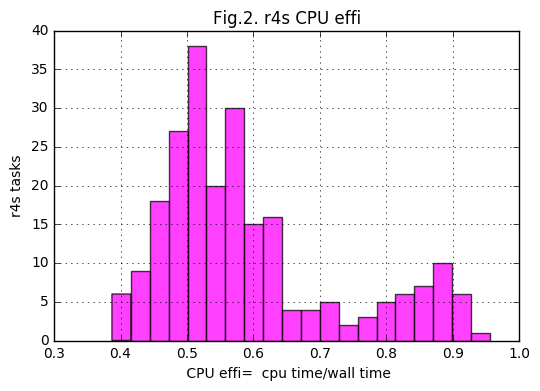

In [63]:
# the histogram  cpu effi
#print(cpuEfiV[1:5])
n, binsA, patches = plt.hist(cpuEfiV, 20,facecolor='magenta', alpha=0.75)  #, range=(1.,3.5)
plt.grid(True)
plt.xlabel(' CPU effi=  cpu time/wall time')
plt.ylabel('r4s tasks')
plt.title('Fig.2. r4s CPU effi')


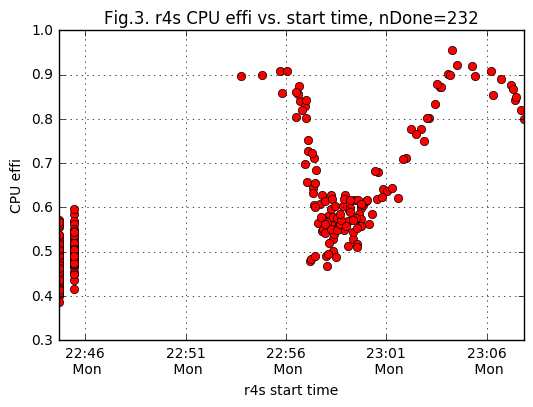

In [64]:
# the histogram  cpu effi  vs. time
#n, binsA, patches = plt.hist(cpuEfiV, 20,facecolor='magenta', alpha=0.75)  #, range=(1.,3.5)

fig, ax = plt.subplots()

ax.plot_date(timeV, cpuEfiV,'ro')
ax.xaxis.set_major_formatter(hfmt)

ax.grid(True)
plt.xlabel('r4s start time')
plt.ylabel('CPU effi')
plt.title('Fig.3. r4s CPU effi vs. start time, nDone=%d'%len(cpuEfiV))